# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
  def compute_svd(A):
    AA = np.dot(A.T, A)
    eigenvalues, V = np.linalg.eigh(AA)
    reversed_eigenvalues_indexes = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[::-1]
    firstZeroIndex = len(eigenvalues) - 1
    for i in range(len(eigenvalues)):
      if eigenvalues[i] <= 0:
        firstZeroIndex = i
        break
    eigenvalues = eigenvalues[:firstZeroIndex]
    reversed_eigenvalues_indexes = reversed_eigenvalues_indexes[:firstZeroIndex]
    V = V[:, reversed_eigenvalues_indexes]

    undiagonalized_S = np.sqrt(eigenvalues)

    U = np.dot(A,V) / undiagonalized_S

    return U, undiagonalized_S, V.T

  def reduce(U, S, Vh, n_components):
    return np.dot(U[:, :n_components], np.diag(S[:n_components]))

  # train_U, train_S, train_Vh = np.linalg.svd(X_train.to_numpy())
  train_U, train_S, train_Vh = compute_svd(X_train.to_numpy())
  reduced_X_train = reduce(train_U, train_S, train_Vh, n_components)

  # test_U, test_S, test_Vh = np.linalg.svd(X_test.to_numpy())
  test_U, test_S, test_Vh = compute_svd(X_test.to_numpy())
  reduced_X_test = reduce(test_U, test_S, test_Vh, n_components)

  return reduced_X_train, train_Vh, reduced_X_test, test_Vh

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [5*k for k in range(1, 21)]  # You need to decide what number to search...
# svd_components = [int(2.5*k/100*784) for k in range(1, 3)]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_train_Vh, X_test_svd, X_test_Vh = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

    results.append((n_components, accuracy, training_time))

top_5_singular_vectors = X_test_Vh[:5]

Training models with different levels of SVD preprocessing...
Applying custom SVD with 5 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 5, Accuracy: 0.6537, Training time: 0.8068 seconds
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.6997, Training time: 1.2197 seconds
Applying custom SVD with 15 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 15, Accuracy: 0.5939, Training time: 1.3828 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.5476, Training time: 1.6931 seconds
Applying custom SVD with 25 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 25, Accuracy: 0.5513, Training time: 4.6961 seconds
Applying custom SVD with 30 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.5486, Training time: 4.3603 seconds
Applying custom SVD with 35 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 35, Accuracy: 0.5296, Training time: 5.1447 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.5129, Training time: 6.8327 seconds
Applying custom SVD with 45 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 45, Accuracy: 0.5099, Training time: 11.9341 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.5078, Training time: 15.4201 seconds
Applying custom SVD with 55 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 55, Accuracy: 0.5013, Training time: 18.4919 seconds
Applying custom SVD with 60 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.4968, Training time: 18.2491 seconds
Applying custom SVD with 65 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 65, Accuracy: 0.4940, Training time: 31.2338 seconds
Applying custom SVD with 70 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 70, Accuracy: 0.4946, Training time: 22.3512 seconds
Applying custom SVD with 75 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 75, Accuracy: 0.4937, Training time: 34.0459 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.4936, Training time: 43.9127 seconds
Applying custom SVD with 85 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 85, Accuracy: 0.4939, Training time: 46.6279 seconds
Applying custom SVD with 90 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 90, Accuracy: 0.4982, Training time: 53.0323 seconds
Applying custom SVD with 95 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 95, Accuracy: 0.4984, Training time: 55.6174 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.4966, Training time: 56.0284 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


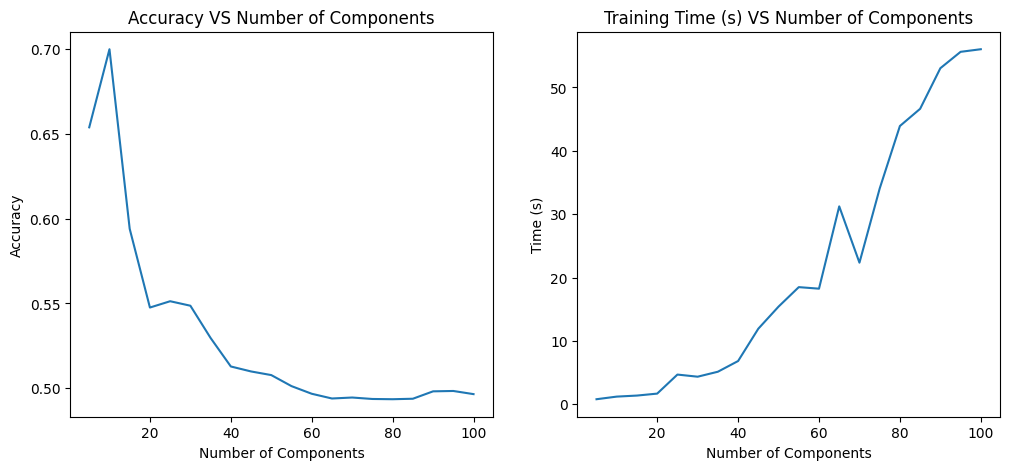

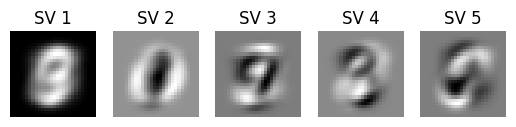

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization
fig, (accuracyGraph, timeGraph) = plt.subplots(1, 2, figsize=(12, 5))

#Accuracy Graph
accuracyGraph.set_title('Accuracy VS Number of Components')
accuracyGraph.set_ylabel('Accuracy')
accuracyGraph.set_xlabel('Number of Components')
accuracyGraph.plot([item[0] for item in results], [item[1] for item in results])

#Training Time Graph
timeGraph.set_title("Training Time (s) VS Number of Components")
timeGraph.set_ylabel('Time (s)')
timeGraph.set_xlabel('Number of Components')
timeGraph.plot([item[0] for item in results], [item[2] for item in results])
plt.show()

#Top 5 Singular Vectors
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.imshow(top_5_singular_vectors[i].reshape((28,28)), cmap='gray')
  plt.title(f'SV {i + 1}')
  plt.axis('off')
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER: \\
Using the top 10 standard vectors to reduce the number of components in the dataset seems to produce the highest accuracy at 0.6997. Increasing the amount of components past 60 seems to have no drastic effect on the test accuracy of the model. As such, it can be concluced the the data has most likely started to overfit on the training set past 60 components. There is a postive correlation between the number of components and the training time. From the top 5 plotted SV components, SV component 4 (the number 3) looks the most distinct to me. It is worth noting that the top SV component is of a number on a black background as opposed to the rest of the components as well. As increasing the number of SV components increases the amount of varience it captures, the top SV component having a black background most likely means that a good portion of the dataset are numbers on a black background as well. This conclusion is consistent with the MNist dataset.